# Focus on Universities across the dataset


In [4]:
import pandas as pd

# Load the CSV files
fuel_df = pd.read_csv('Data/Fuel.csv')
industry_df = pd.read_csv('Data/Industry.csv')
unit_df = pd.read_csv('Data/Unit.csv')

# Display the first few rows of each dataframe to understand their structure and contents
fuel_df_head = fuel_df.head()
industry_df_head = industry_df.head()
unit_df_head = unit_df.head()

display(fuel_df_head)

display(industry_df_head)

display(unit_df_head)

,Facility.Id,FRS.Id,Facility.Name,City,State,Primary.NAICS.Code,Year,Industry.Type,Sector,Unit.Name,Fuel.Type,Specific.Fuel.Type,Other.Fuel.Name,Blend.Fuel.Name,Methane.emissions,Nitrous.Oxide.emissions
0,1000112,1.100440e+11,23rd and 3rd,Brooklyn,NY,221112,2022,"C,D",Power Plants,2301,Natural Gas,Natural Gas (Weighted U.S. Average),NaN,NaN,16.5,20.86
1,1000112,1.100440e+11,23rd and 3rd,Brooklyn,NY,221112,2022,"C,D",Power Plants,2302,Natural Gas,Natural Gas (Weighted U.S. Average),NaN,NaN,15.0,17.88
2,1000112,1.100440e+11,23rd and 3rd,Brooklyn,NY,221112,2022,"C,D",Power Plants,Heatec1,Natural Gas,Natural Gas (Weighted U.S. Average),NaN,NaN,0.0,0.00
3,1000112,1.100440e+11,23rd and 3rd,Brooklyn,NY,221112,2022,"C,D",Power Plants,Heatec2,Natural Gas,Natural Gas (Weighted U.S. Average),NaN,NaN,0.0,0.00
4,1000112,1.100440e+11,23rd and 3rd,Brooklyn,NY,221112,2021,"C,D",Power Plants,2301,Natural Gas,Natural Gas (Weighted U.S. Average),NaN,NaN,11.0,11.92


,Subpart Letter,Name of industry,Facility Type
0,C,Stationary Combustion,Direct Emitter
1,D,Electricity Generation,Direct Emitter
2,E,Adipic Acid Production,Direct Emitter
3,F,Aluminum Production,Direct Emitter
4,G,Ammonia Manufacturing,Direct Emitter


,Facility.Id,FRS.Id,Facility.Name,City,State,Primary.NAICS.Code,Year,Industry.Type,Sector,Unit.Name,Unit.Type,Method,Max.Heat,CO2.emissions.non.biogenic.,Methane.emissions,Nitrous.Oxide.emissions,CO2.emissions.biogenic.
0,1000112,1.100000e+11,23rd and 3rd,Brooklyn,NY,221112,2022,"C,D",Power Plants,Heatec1,PRH (Process Heater),Tier1/2/3,7.4,176.7,0.0,0.0,0.0
1,1000112,1.100000e+11,23rd and 3rd,Brooklyn,NY,221112,2022,"C,D",Power Plants,Heatec2,PRH (Process Heater),Tier1/2/3,7.4,154.7,0.0,0.0,0.0
2,1000112,1.100000e+11,23rd and 3rd,Brooklyn,NY,221112,2021,"C,D",Power Plants,Heatec1,PRH (Process Heater),Tier1/2/3,7.4,84.4,0.0,0.0,0.0
3,1000112,1.100000e+11,23rd and 3rd,Brooklyn,NY,221112,2021,"C,D",Power Plants,Heatec2,PRH (Process Heater),Tier1/2/3,7.4,78.9,0.0,0.0,0.0
4,1000112,1.100000e+11,23rd and 3rd,Brooklyn,NY,221112,2020,"C,D",Power Plants,Heatec1,PRH (Process Heater),Tier1/2/3,7.4,90.7,0.0,0.0,0.0


In [6]:
# Filter data for university-related facilities based on NAICS code (61xxxxx)
university_naics_prefix = 61
university_fuel_df = fuel_df[fuel_df['Primary.NAICS.Code'].astype(str).str.startswith(str(university_naics_prefix))]
university_unit_df = unit_df[unit_df['Primary.NAICS.Code'].astype(str).str.startswith(str(university_naics_prefix))]

# Summarize emissions by year for university-related facilities in both datasets
university_fuel_emissions_summary = university_fuel_df.groupby('Year').agg({
    'Methane.emissions': 'sum',
    'Nitrous.Oxide.emissions': 'sum'
}).reset_index()

university_unit_emissions_summary = university_unit_df.groupby('Year').agg({
    'CO2.emissions.non.biogenic.': 'sum',
    'Methane.emissions': 'sum',
    'Nitrous.Oxide.emissions': 'sum'
}).reset_index()

# Combine the summaries for a comprehensive view
university_emissions_summary = pd.merge(university_fuel_emissions_summary, university_unit_emissions_summary, on='Year', how='outer', suffixes=('_fuel', '_unit'))

# For comparison, summarize emissions for all sectors by year in the Fuel dataset
sector_fuel_emissions_summary = fuel_df.groupby(['Year', 'Industry.Type']).agg({
    'Methane.emissions': 'sum',
    'Nitrous.Oxide.emissions': 'sum'
}).reset_index()

# And in the Unit dataset
sector_unit_emissions_summary = unit_df.groupby(['Year', 'Industry.Type']).agg({
    'CO2.emissions.non.biogenic.': 'sum',
    'Methane.emissions': 'sum',
    'Nitrous.Oxide.emissions': 'sum'
}).reset_index()

# Prepare data for comparison
university_emissions_summary['Total.emissions'] = university_emissions_summary[['Methane.emissions_fuel', 'Nitrous.Oxide.emissions_fuel', 'CO2.emissions.non.biogenic.', 'Methane.emissions_unit', 'Nitrous.Oxide.emissions_unit']].sum(axis=1)

# Display summarized emissions for university-related facilities and sectors
university_emissions_summary


,Year,Methane.emissions_fuel,Nitrous.Oxide.emissions_fuel,CO2.emissions.non.biogenic.,Methane.emissions_unit,Nitrous.Oxide.emissions_unit,Total.emissions
0,2011,11550.25,20860.894,7915987.20,8928.25,15317.498,7972644.092
1,2012,9242.50,15799.066,7556940.32,7224.50,11637.496,7600843.882
2,2013,8733.75,14303.404,7819180.86,7087.75,10728.298,7860034.062
3,2014,8971.75,15224.224,7961573.48,7602.00,11858.910,8005230.364
4,2015,8072.50,12512.126,7584581.06,6447.25,9797.048,7621409.984
5,2016,7008.75,10541.452,7402540.24,5826.25,8643.490,7434560.182
6,2017,6593.25,9698.112,7594637.62,5685.75,8203.046,7624817.778
7,2018,7237.50,12340.478,8018433.24,6300.00,10799.520,8055110.738
8,2019,6823.25,11296.286,7848734.22,5951.25,9868.866,7882673.872
9,2020,6089.00,10225.870,7358920.72,5388.00,9104.794,7389728.384


In [8]:
display(sector_fuel_emissions_summary.head())
display(sector_unit_emissions_summary.head())

,Year,Industry.Type,Methane.emissions,Nitrous.Oxide.emissions
0,2010,"AA,C",605217.50,1209075.102
1,2010,"AA,C,PP",46442.25,91636.490
2,2011,"AA,C",240965.00,442253.456
3,2011,"AA,C,II",299.75,559.346
4,2011,"AA,C,II,PP,TT",5874.50,10684.194


,Year,Industry.Type,CO2.emissions.non.biogenic.,Methane.emissions,Nitrous.Oxide.emissions
0,2011,"AA,C",2991916.74,68345.75,107394.134
1,2011,"AA,C,II",110787.20,120.50,203.534
2,2011,"AA,C,II,PP,TT",137139.00,2186.25,3398.690
3,2011,"AA,C,II,TT",543643.80,3908.00,6254.722
4,2011,"AA,C,MM,TT",73398.60,2116.50,3355.778


**University-Related Emissions Summary (2011-2022):**

The total emissions for university-related facilities, combining methane, nitrous oxide, and CO2 emissions (both from fuel and unit datasets), show a general trend of fluctuation over the years. The total emissions in 2022 amounted to approximately 7,763,074.874 units, which is a significant amount but shows a decrease from the peak emissions observed in 2014 and 2018.
Comparison with Other Sectors (2010-2011):

The sector-wise emissions summary for other industries (from the Fuel and Unit datasets) for the years 2010 and 2011 shows that the emissions from university-related facilities are relatively smaller when compared to broader sectors like AA,C (which might represent a combination of different industries).



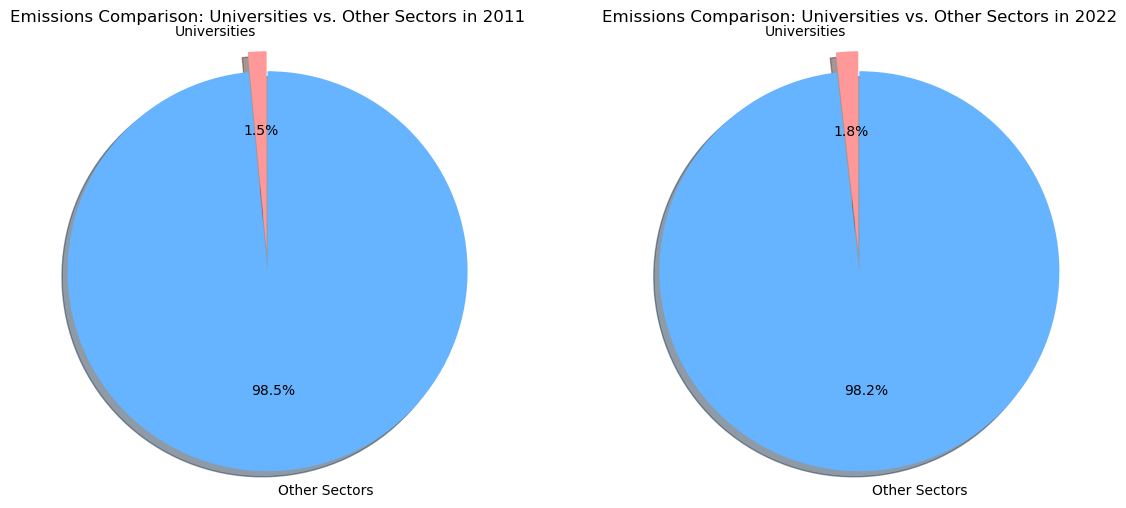

In [14]:
import matplotlib.pyplot as plt

# Select the years for comparison
years = [2011, 2022]

# Initialize lists to store total emissions for universities and other sectors for each year
university_total_emissions = []
total_emissions_other_sectors = []

# Calculate total emissions for universities and other sectors for each year
for year in years:
    # Total emissions for university-related facilities in the selected year
    university_total_emissions.append(university_emissions_summary.loc[university_emissions_summary['Year'] == year, 'Total.emissions'].sum())

    # Total emissions for all sectors in the selected year from the Fuel dataset
    total_emissions_other_sectors_fuel = sector_fuel_emissions_summary.loc[sector_fuel_emissions_summary['Year'] == year, ['Methane.emissions', 'Nitrous.Oxide.emissions']].sum().sum()

    # Total emissions for all sectors in the selected year from the Unit dataset
    total_emissions_other_sectors_unit = sector_unit_emissions_summary.loc[sector_unit_emissions_summary['Year'] == year, ['CO2.emissions.non.biogenic.', 'Methane.emissions', 'Nitrous.Oxide.emissions']].sum().sum()

    # Total emissions from other sectors (excluding university-related emissions)
    total_emissions_other_sectors.append(total_emissions_other_sectors_fuel + total_emissions_other_sectors_unit - university_total_emissions[-1])

# Data for pie charts
labels = ['Universities', 'Other Sectors']
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # explode 1st slice

# Plot pie charts for each year
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

for i, year in enumerate(years):
    sizes = [university_total_emissions[i], total_emissions_other_sectors[i]]

    axs[i].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
    axs[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    axs[i].set_title(f'Emissions Comparison: Universities vs. Other Sectors in {year}')

plt.show()


## Exploring Emissions over 2011 to 2022 

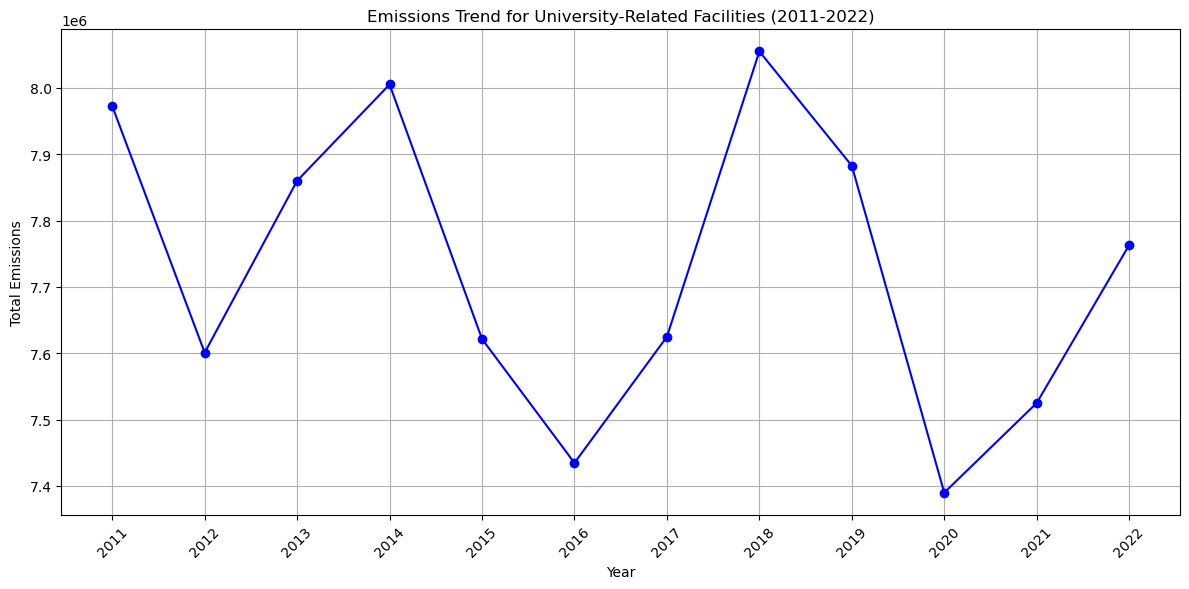

In [15]:
# Plotting the emissions trend for university-related facilities over the years
plt.figure(figsize=(12, 6))
plt.plot(university_emissions_summary['Year'], university_emissions_summary['Total.emissions'], marker='o', linestyle='-', color='b')

plt.title('Emissions Trend for University-Related Facilities (2011-2022)')
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.grid(True)
plt.xticks(university_emissions_summary['Year'], rotation=45)
plt.tight_layout()  # Adjust layout to not cut off labels

plt.show()


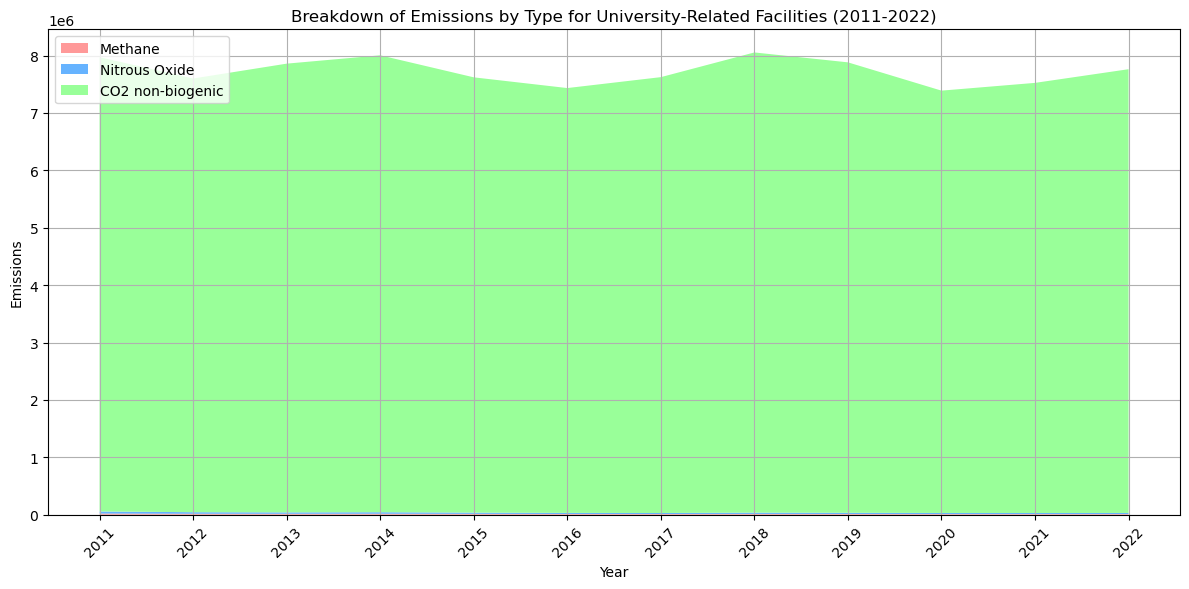

In [16]:
# Preparing the data for the stacked area chart
years = university_emissions_summary['Year']
methane_emissions_fuel = university_emissions_summary['Methane.emissions_fuel']
nitrous_oxide_emissions_fuel = university_emissions_summary['Nitrous.Oxide.emissions_fuel']
co2_emissions_non_biogenic = university_emissions_summary['CO2.emissions.non.biogenic.']
methane_emissions_unit = university_emissions_summary['Methane.emissions_unit']
nitrous_oxide_emissions_unit = university_emissions_summary['Nitrous.Oxide.emissions_unit']

# Combining methane and nitrous oxide emissions from both fuel and unit datasets for the chart
total_methane_emissions = methane_emissions_fuel + methane_emissions_unit
total_nitrous_oxide_emissions = nitrous_oxide_emissions_fuel + nitrous_oxide_emissions_unit

# Plotting the stacked area chart
plt.figure(figsize=(12, 6))
plt.stackplot(years, total_methane_emissions, total_nitrous_oxide_emissions, co2_emissions_non_biogenic, labels=['Methane', 'Nitrous Oxide', 'CO2 non-biogenic'], colors=['#ff9999', '#66b3ff', '#99ff99'])
plt.legend(loc='upper left')
plt.title('Breakdown of Emissions by Type for University-Related Facilities (2011-2022)')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.xticks(years, rotation=45)
plt.grid(True)
plt.tight_layout()  # Adjust layout to not cut off labels

plt.show()


It appears CO2 is on much grander scale -> need to visualize Methane vs Nitrous Oxide

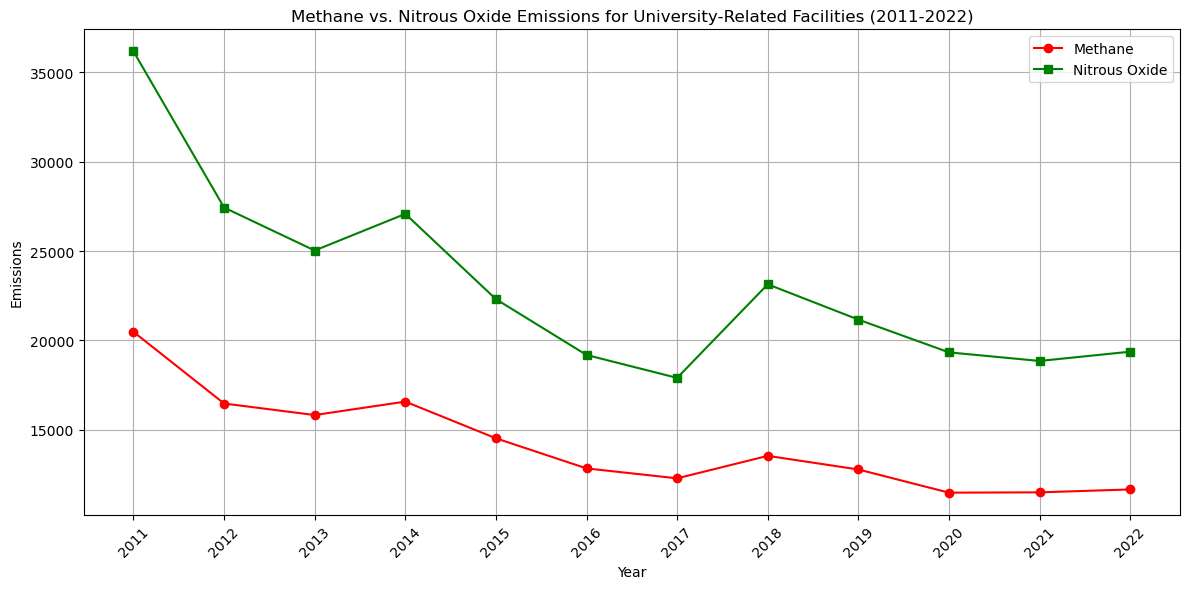

In [17]:
# Plotting Methane vs Nitrous Oxide emissions for university-related facilities over the years
plt.figure(figsize=(12, 6))
plt.plot(years, total_methane_emissions, marker='o', linestyle='-', color='r', label='Methane')
plt.plot(years, total_nitrous_oxide_emissions, marker='s', linestyle='-', color='g', label='Nitrous Oxide')

plt.title('Methane vs. Nitrous Oxide Emissions for University-Related Facilities (2011-2022)')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.legend()
plt.grid(True)
plt.xticks(years, rotation=45)
plt.tight_layout()  # Adjust layout to not cut off labels

plt.show()


## Exploring Emissions per State and Region

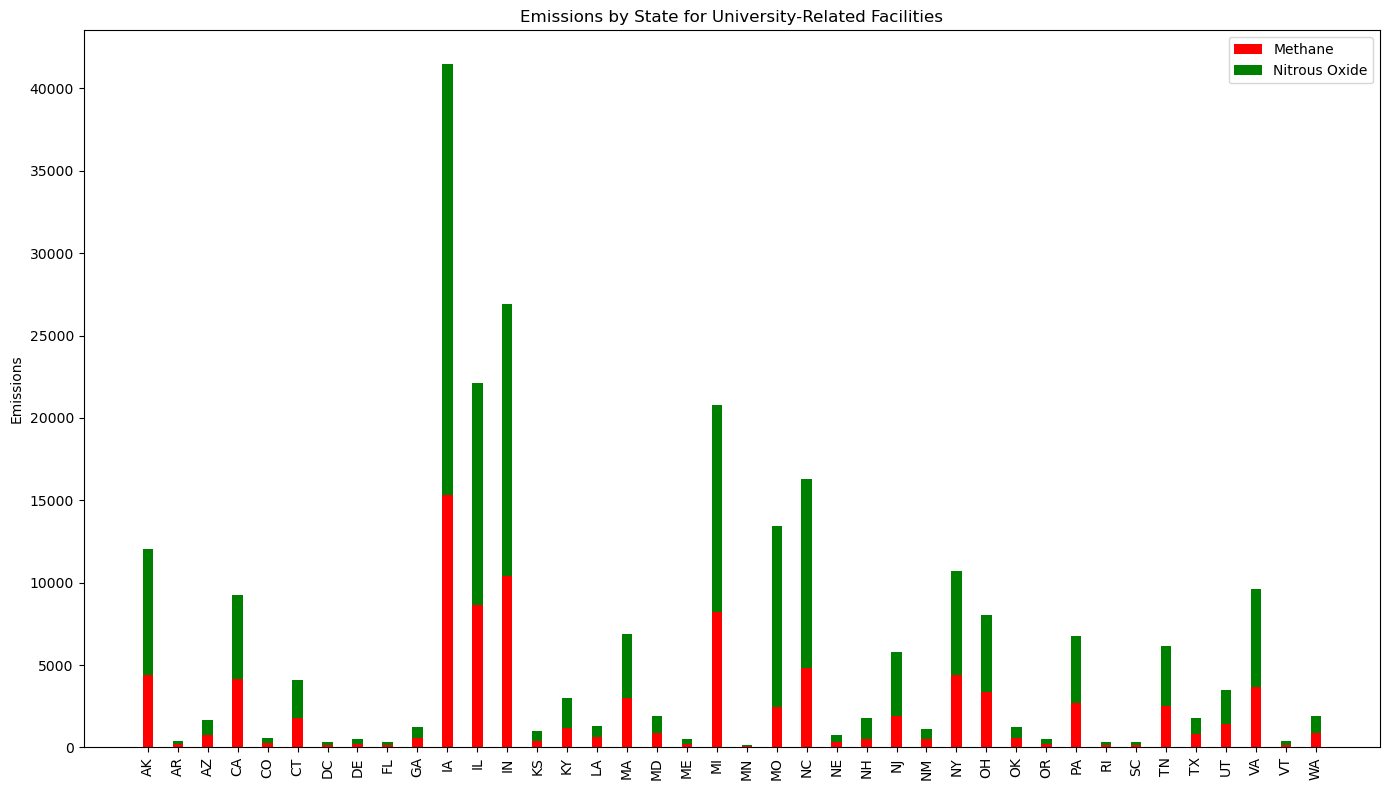

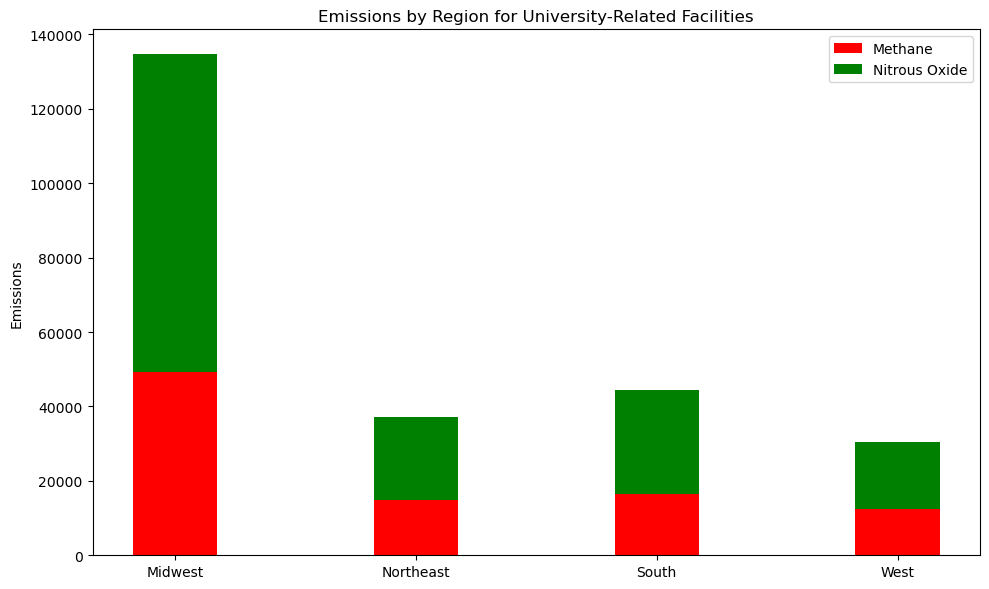

In [18]:
# Aggregate emissions data for university-related facilities by state
statewise_emissions = university_fuel_df.groupby('State').agg({
    'Methane.emissions': 'sum',
    'Nitrous.Oxide.emissions': 'sum'
}).reset_index()

# Plotting statewise emissions for comparison
plt.figure(figsize=(14, 8))
width = 0.35  # the width of the bars
ind = range(len(statewise_emissions))  # the x locations for the groups

p1 = plt.bar(ind, statewise_emissions['Methane.emissions'], width, color='r', label='Methane')
p2 = plt.bar(ind, statewise_emissions['Nitrous.Oxide.emissions'], width, bottom=statewise_emissions['Methane.emissions'], color='g', label='Nitrous Oxide')

plt.ylabel('Emissions')
plt.title('Emissions by State for University-Related Facilities')
plt.xticks(ind, statewise_emissions['State'], rotation='vertical')
plt.legend((p1[0], p2[0]), ('Methane', 'Nitrous Oxide'))

plt.tight_layout()
plt.show()

# For regional analysis, we need to define the mapping of states to regions
# This is a simplified version and might not cover all states or adhere to all regional definitions
regions = {
    'Northeast': ['CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA'],
    'Midwest': ['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'SD', 'WI'],
    'South': ['DE', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'DC', 'WV', 'AL', 'KY', 'MS', 'TN', 'AR', 'LA', 'OK', 'TX'],
    'West': ['AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT', 'WY', 'AK', 'CA', 'HI', 'OR', 'WA']
}

# Mapping states to regions and aggregating emissions data
statewise_emissions['Region'] = statewise_emissions['State'].apply(lambda x: next((region for region, states in regions.items() if x in states), 'Other'))
regional_emissions = statewise_emissions.groupby('Region').agg({
    'Methane.emissions': 'sum',
    'Nitrous.Oxide.emissions': 'sum'
}).reset_index()

# Plotting regional emissions for comparison
plt.figure(figsize=(10, 6))
ind = range(len(regional_emissions))  # the x locations for the groups

p1 = plt.bar(ind, regional_emissions['Methane.emissions'], width, color='r', label='Methane')
p2 = plt.bar(ind, regional_emissions['Nitrous.Oxide.emissions'], width, bottom=regional_emissions['Methane.emissions'], color='g', label='Nitrous Oxide')

plt.ylabel('Emissions')
plt.title('Emissions by Region for University-Related Facilities')
plt.xticks(ind, regional_emissions['Region'])
plt.legend((p1[0], p2[0]), ('Methane', 'Nitrous Oxide'))

plt.tight_layout()
plt.show()


## Biogenic vs NonBiogenic emissions

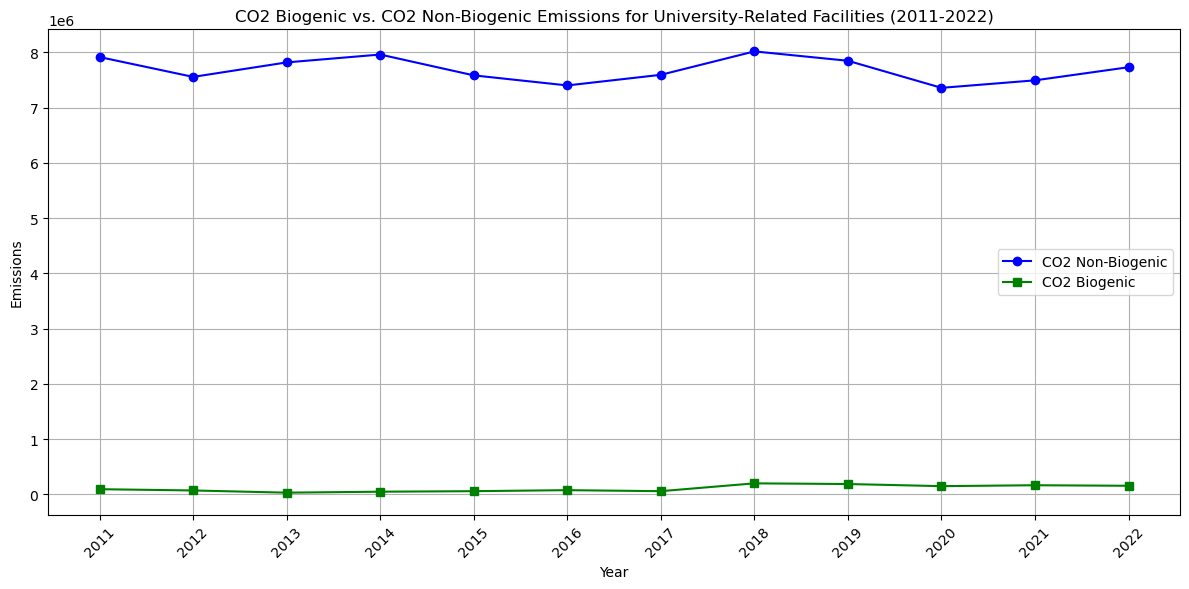

In [19]:
# Aggregate CO2 biogenic and CO2 non-biogenic emissions data for university-related facilities
co2_emissions_summary = university_unit_df.groupby('Year').agg({
    'CO2.emissions.non.biogenic.': 'sum',
    'CO2.emissions.biogenic.': 'sum'
}).reset_index()

# Plotting CO2 biogenic vs. CO2 non-biogenic emissions for university-related facilities over the years
plt.figure(figsize=(12, 6))
plt.plot(co2_emissions_summary['Year'], co2_emissions_summary['CO2.emissions.non.biogenic.'], marker='o', linestyle='-', color='b', label='CO2 Non-Biogenic')
plt.plot(co2_emissions_summary['Year'], co2_emissions_summary['CO2.emissions.biogenic.'], marker='s', linestyle='-', color='g', label='CO2 Biogenic')

plt.title('CO2 Biogenic vs. CO2 Non-Biogenic Emissions for University-Related Facilities (2011-2022)')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.legend()
plt.grid(True)
plt.xticks(co2_emissions_summary['Year'], rotation=45)
plt.tight_layout()  # Adjust layout to not cut off labels

plt.show()
